In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/EURON 프로젝트/train.csv')

한글 -> 영어 변환

In [ ]:
df = df.rename(columns={'일시':'date',
    '광진구': 'Gwangjin',
    '동대문구': 'Dongdaemun',
    '성동구': 'Seongdong',
    '중랑구': 'Jungnang'
})

datetime 변환

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5,6])

# 새 섹션

In [ ]:
df.head()

,date,Gwangjin,Dongdaemun,Seongdong,Jungnang,year,month,day,weekday,is_weekend
0,2018-01-01,0.592,0.368,0.580,0.162,2018,1,1,0,False
1,2018-01-02,0.840,0.614,1.034,0.260,2018,1,2,1,False
2,2018-01-03,0.828,0.576,0.952,0.288,2018,1,3,2,False
3,2018-01-04,0.792,0.542,0.914,0.292,2018,1,4,3,False
4,2018-01-05,0.818,0.602,0.994,0.308,2018,1,5,4,False


#EDA

결측치 확인

In [ ]:
df.isnull().sum()

,0
date,0
Gwangjin,0
Dongdaemun,0
Seongdong,0
Jungnang,0
year,0
month,0
day,0
weekday,0
is_weekend,0


outlier 확인

In [ ]:
Q1 = df[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].quantile(0.25)
Q3 = df[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']] < (Q1 - 1.5 * IQR)) |
            (df[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']] > (Q3 + 1.5 * IQR)))

print(outliers.sum())  # 구별 이상치 개수 출력

Gwangjin      0
Dongdaemun    0
Seongdong     0
Jungnang      0
dtype: int64


구별 평균 대여량

In [ ]:
df.describe()
df[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].mean()

,0
Gwangjin,6.209194
Dongdaemun,4.233670
Seongdong,5.182951
Jungnang,3.138747


광진구: 하루 평균 6200명이 대여함

<Axes: >

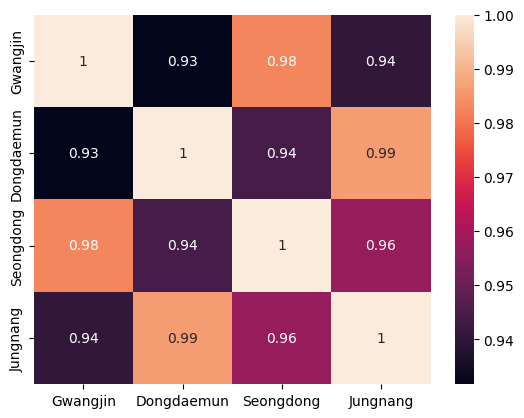

In [ ]:
import seaborn as sns
sns.heatmap(df[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].corr(), annot=True)

<Figure size 1500x500 with 0 Axes>

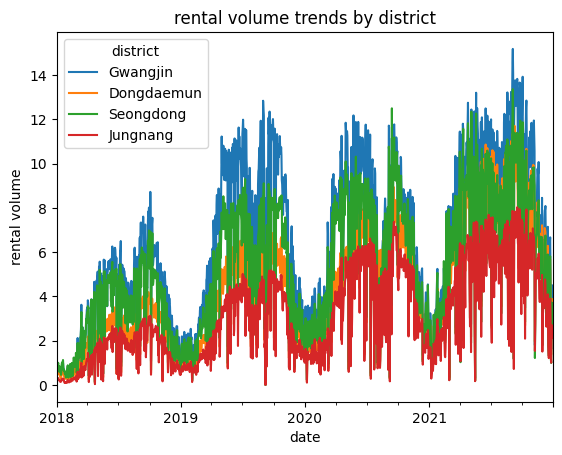

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

# '일시'를 인덱스로 설정한 후 구별로 그리기
ax=df.set_index('date')[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].plot()
plt.title("rental volume trends by district")
plt.xlabel("date")
plt.ylabel("rental volume")
plt.legend(title="district")
plt.show()

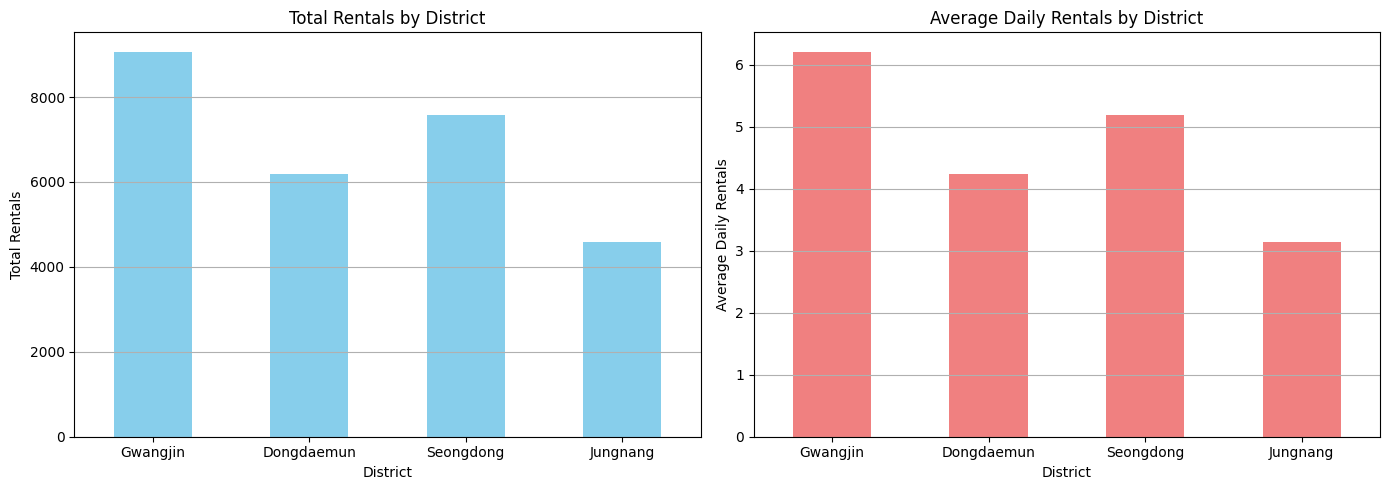

In [ ]:
import matplotlib.pyplot as plt

# 데이터 계산
gu_total = df[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].sum()
gu_avg = df[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].mean()

# Figure 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1행 2열

# 첫 번째 그래프: 구별 총 대여량
gu_total.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Total Rentals by District")
axes[0].set_xlabel("District")
axes[0].set_ylabel("Total Rentals")
axes[0].set_xticklabels(gu_total.index, rotation=0)
axes[0].grid(axis='y')

# 두 번째 그래프: 구별 하루 평균 대여량
gu_avg.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title("Average Daily Rentals by District")
axes[1].set_xlabel("District")
axes[1].set_ylabel("Average Daily Rentals")
axes[1].set_xticklabels(gu_avg.index, rotation=0)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

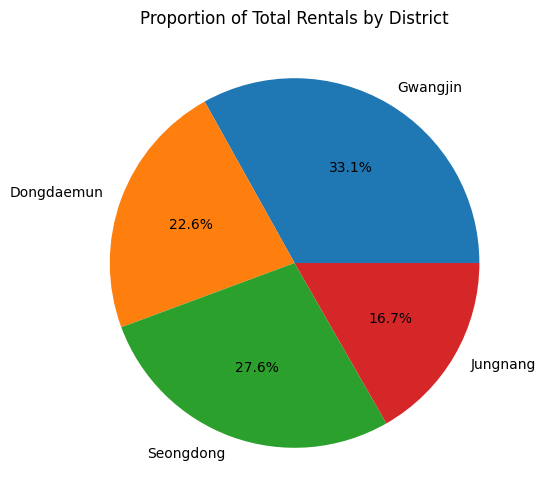

In [ ]:
gu_total.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Proportion of Total Rentals by District")
plt.ylabel("")
plt.show()

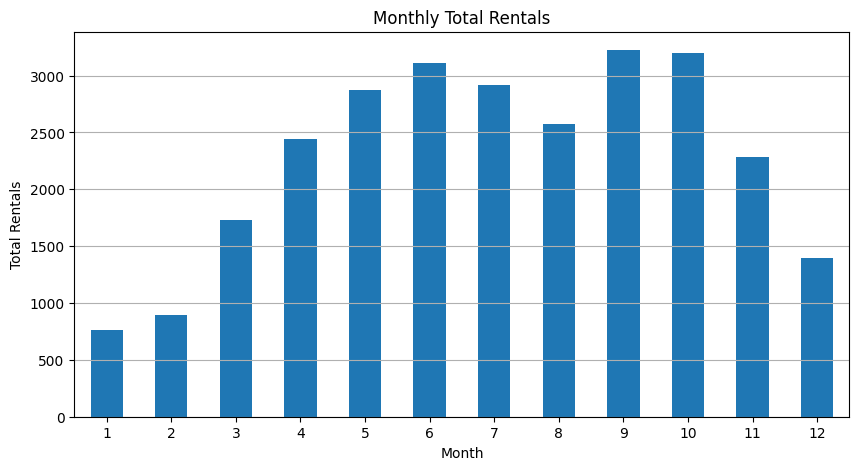

In [ ]:
# Copy the original DataFrame
df_copy = df.copy()

# Add 'total' column
df_copy['total'] = df_copy[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].sum(axis=1)

# Calculate monthly total rentals
monthly_total = df_copy.groupby('month')['total'].sum()

# Visualization
monthly_total.plot(kind='bar', figsize=(10, 5))
plt.title('Monthly Total Rentals')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

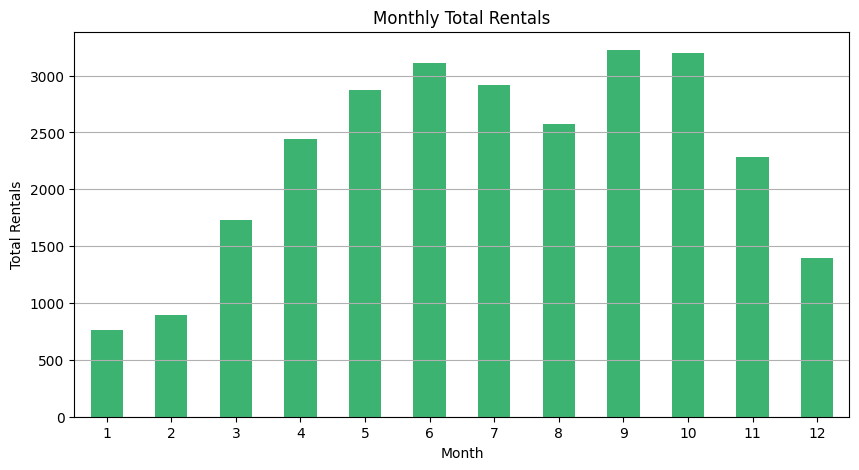

In [ ]:
import matplotlib.pyplot as plt

# Copy the original DataFrame
df_copy = df.copy()

# Add 'total' column
df_copy['total'] = df_copy[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].sum(axis=1)

# Calculate monthly total rentals
monthly_total = df_copy.groupby('month')['total'].sum()

# Visualization
monthly_total.plot(kind='bar', figsize=(10, 5), color='mediumseagreen')  # 초록색 계열
plt.title('Monthly Total Rentals')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


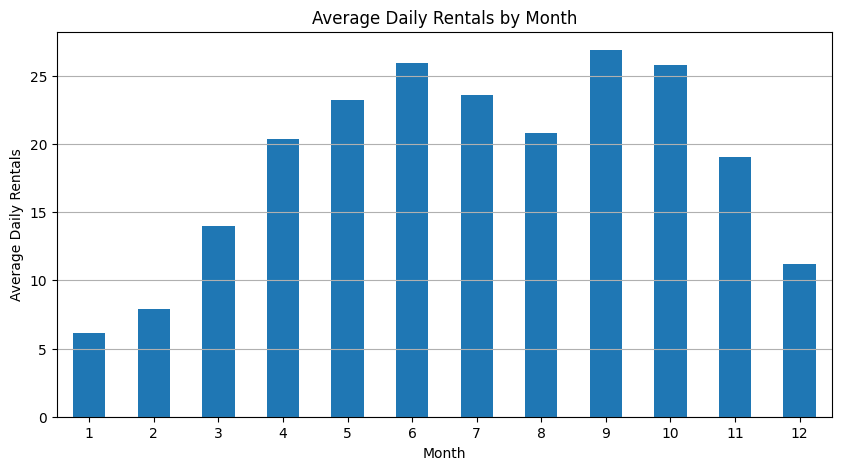

In [ ]:
# 월별 하루 평균 대여량 계산
monthly_mean = df_copy.groupby('month')['total'].mean()

# 시각화
monthly_mean.plot(kind='bar', figsize=(10, 5))
plt.title('Average Daily Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

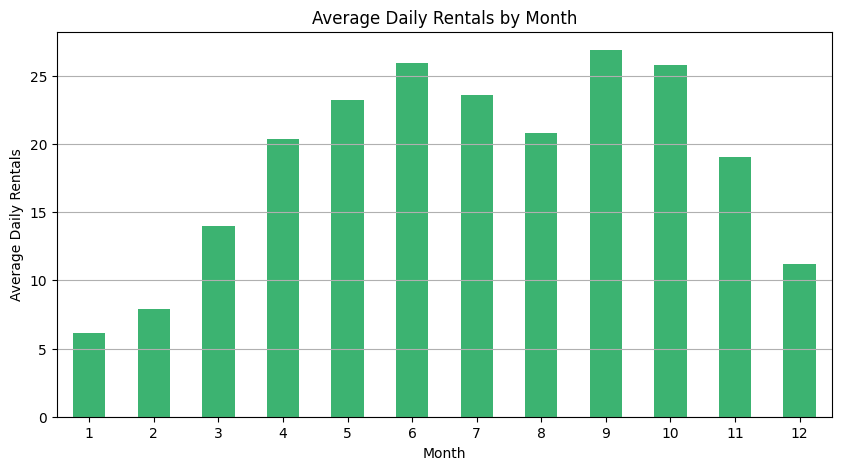

In [ ]:
# 월별 하루 평균 대여량 계산
monthly_mean = df_copy.groupby('month')['total'].mean()

# 시각화
monthly_mean.plot(kind='bar', figsize=(10, 5), color='mediumseagreen')  # 초록색 적용
plt.title('Average Daily Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

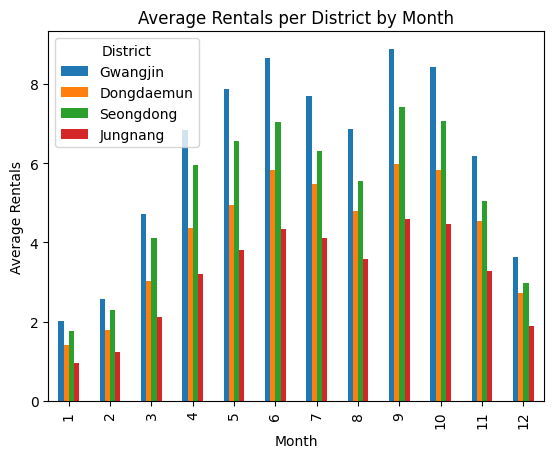

In [ ]:
# 월별 구별 평균 대여량 시각화
ax = df.groupby('month')[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].mean().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Average Rentals per District by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.legend(title="District")
plt.show()

계절 생성

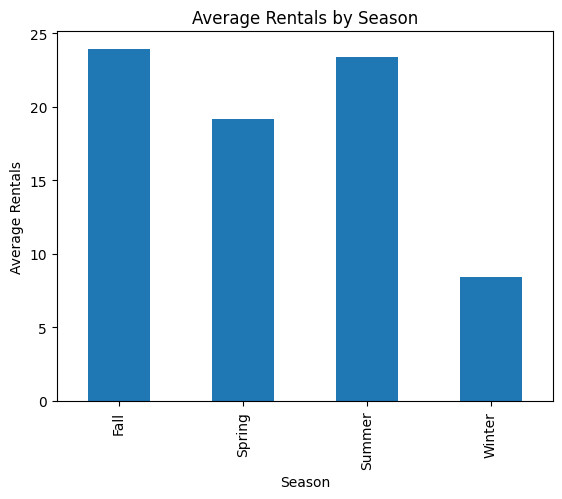

In [ ]:
def get_season(month):
    if month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Fall'
    else: return 'Winter'

df_copy['season'] = df_copy['month'].apply(get_season)

ax = df_copy.groupby('season')['total'].mean().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.show()

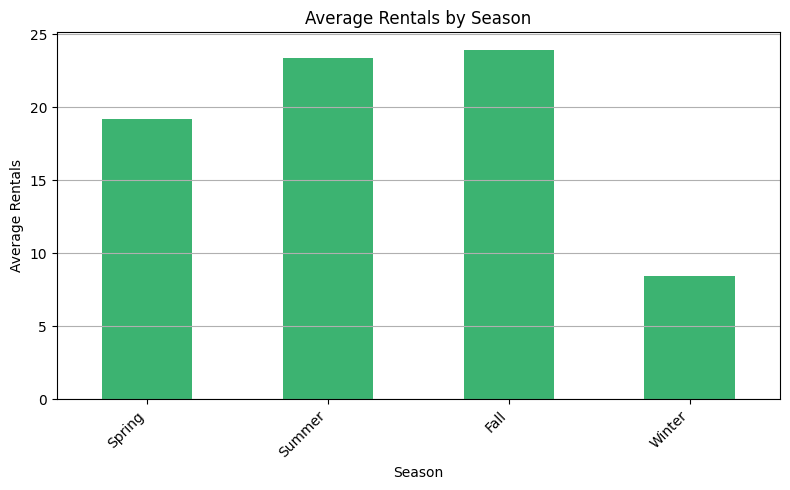

In [ ]:
def get_season(month):
    if month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Fall'
    else: return 'Winter'

df_copy['season'] = df_copy['month'].apply(get_season)

# 계절 순서 지정
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_mean = df_copy.groupby('season')['total'].mean().reindex(season_order)

# 시각화
ax = season_mean.plot(kind='bar', color='mediumseagreen', figsize=(8, 5))
ax.set_xticklabels(season_order, rotation=45, ha='right')  # 오른쪽 기울기

plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

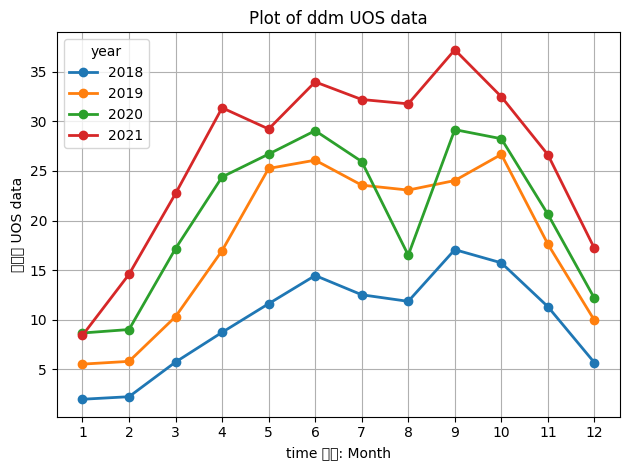

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜 처리
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['year'] = df_copy['date'].dt.year
df_copy['month'] = df_copy['date'].dt.month

# 월별 평균 대여량 계산 (연도별)
monthly_by_year = df_copy.groupby(['year', 'month'])['total'].mean().reset_index()

# 피벗: row=month, column=year, value=대여량
pivot_df = monthly_by_year.pivot(index='month', columns='year', values='total')

# 그래프 그리기
plt.figure(figsize=(10, 6))
pivot_df.plot(marker='o', linewidth=2)

plt.title("Plot of ddm UOS data")
plt.xlabel("time 단위: Month")
plt.ylabel("동대문 UOS data")
plt.grid(True)
plt.xticks(range(1, 13))
plt.legend(title="year")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

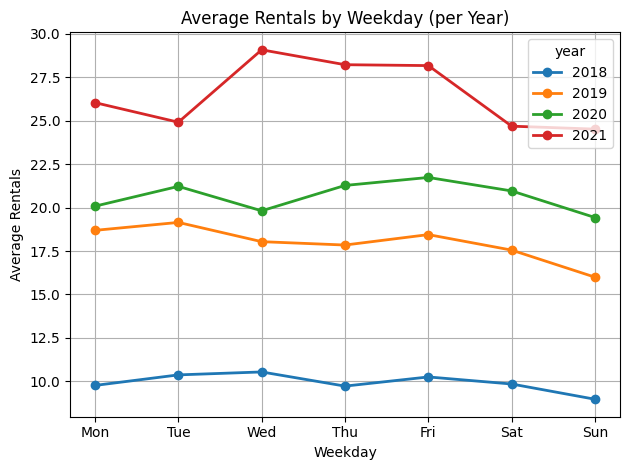

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜 처리 (이미 되어 있다면 생략 가능)
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['year'] = df_copy['date'].dt.year
df_copy['weekday'] = df_copy['date'].dt.weekday  # 0=월요일, 6=일요일

# 요일별 평균 대여량 계산 (연도별)
weekday_by_year = df_copy.groupby(['year', 'weekday'])['total'].mean().reset_index()

# 피벗: row=weekday, column=year, value=대여량
pivot_weekday = weekday_by_year.pivot(index='weekday', columns='year', values='total')

# 요일 이름 리스트
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# 그래프 그리기
plt.figure(figsize=(10, 6))
pivot_weekday.plot(marker='o', linewidth=2)

plt.title("Average Rentals by Weekday (per Year)")
plt.xlabel("Weekday")
plt.ylabel("Average Rentals")
plt.xticks(ticks=range(7), labels=weekday_labels)
plt.grid(True)
plt.legend(title="year")
plt.tight_layout()
plt.show()

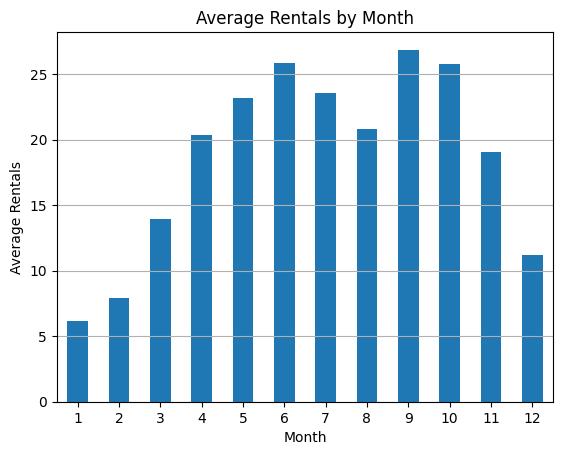

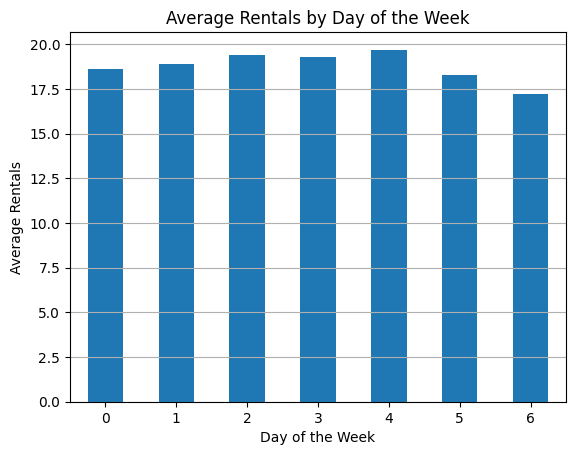

In [ ]:
# 월별 하루 평균 대여량
df_copy.groupby('month')['total'].mean().plot(kind='bar', title="Average Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 요일별 하루 평균 대여량
df_copy.groupby('weekday')['total'].mean().plot(kind='bar', title="Average Rentals by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Rentals")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

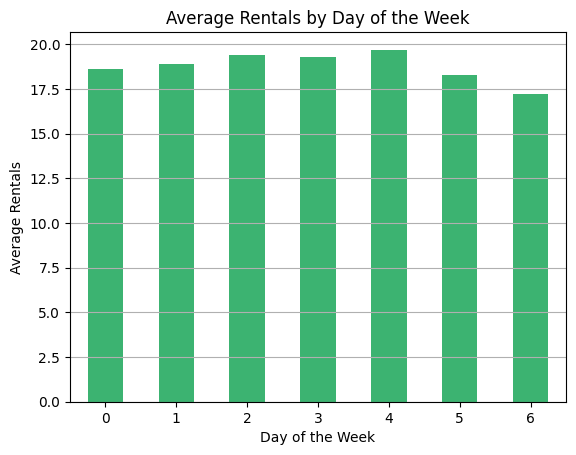

In [ ]:
# 요일별 하루 평균 대여량
df_copy.groupby('weekday')['total'].mean().plot(
    kind='bar',
    title="Average Rentals by Day of the Week",
    color='mediumseagreen'  # 예쁜 초록색
)
plt.xlabel("Day of the Week")
plt.ylabel("Average Rentals")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


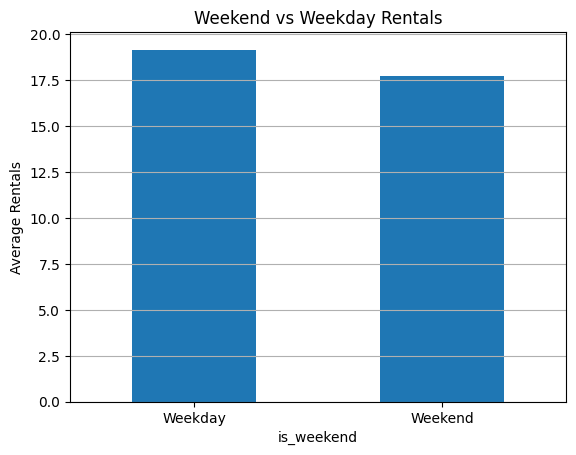

In [ ]:
# 주말 vs 평일 평균 대여량

ax = df_copy.groupby('is_weekend')['total'].mean().plot(kind='bar', title="Weekend vs Weekday Rentals")
ax.set_xticklabels(['Weekday', 'Weekend'], rotation=0)  # True/False를 영어 라벨로 변경
plt.ylabel("Average Rentals")
plt.grid(axis='y')
plt.show()

📊 Average Rentals by Weekday
weekday
Mon    18.601349
Tue    18.914191
Wed    19.370775
Thu    19.276488
Fri    19.691713
Sat    18.260577
Sun    17.227077
Name: total, dtype: float64


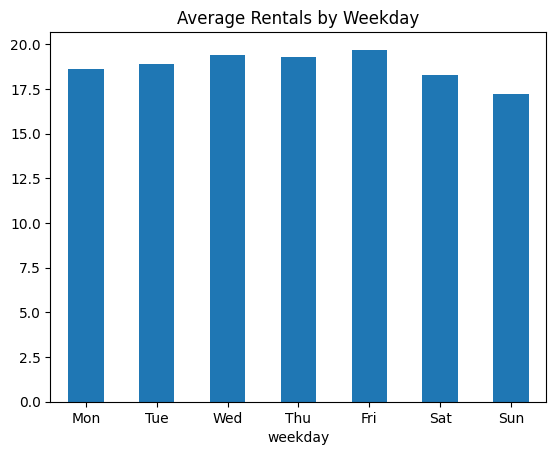

In [ ]:
# Weekday mapping: numeric to string
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Group by weekday and calculate average
weekday_avg = df_copy.groupby('weekday')['total'].mean().rename(index=weekday_map)

# Print values
print("📊 Average Rentals by Weekday")
print(weekday_avg)

# Plot
weekday_avg.plot(kind='bar', title='Average Rentals by Weekday')
plt.xticks(rotation=0)
plt.show()

급증/급감일

In [ ]:
df3=df_copy.copy()
df3['rolling_mean'] = df3['total'].rolling(window=3, center=True).mean()
df3['residual'] = df3['total'] - df3['rolling_mean']

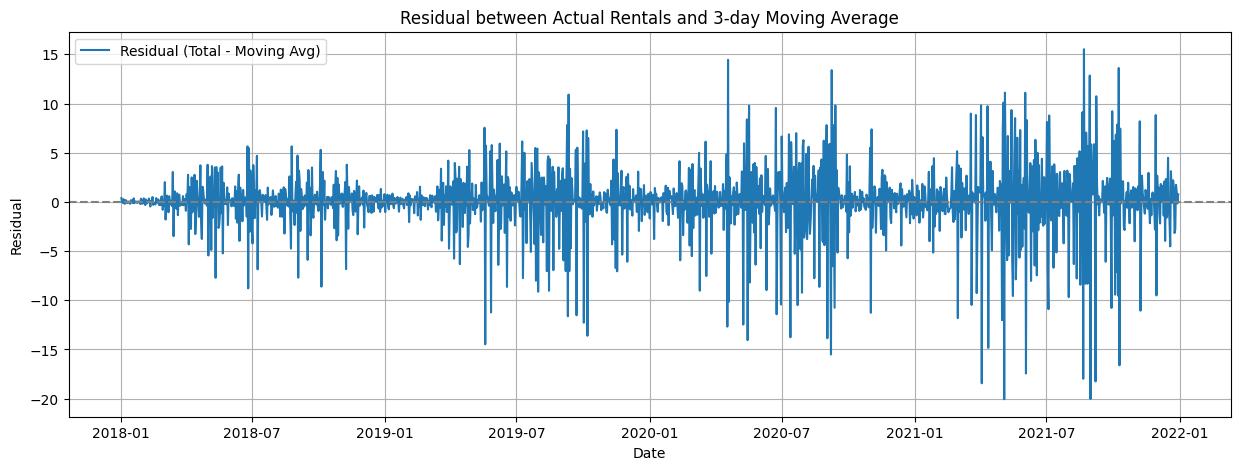

In [ ]:
import matplotlib.pyplot as plt

df3['residual'] = df3['total'] - df3['rolling_mean']

plt.figure(figsize=(15,5))
plt.plot(df3['date'], df3['residual'], label='Residual (Total - Moving Avg)')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residual between Actual Rentals and 3-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Residual이 가장 큰 날 10개 추출
top_spike_days = df3.sort_values('residual', ascending=False).head(10)
print("📈 잔차가 가장 큰 날 (급증일 후보)")
print(top_spike_days[['date', 'total', 'residual']])

📈 잔차가 가장 큰 날 (급증일 후보)
           date   total   residual
1329 2021-08-22  36.278  15.524000
838  2020-04-18  32.432  14.443333
1377 2021-10-09  36.208  13.614667
981  2020-09-08  31.974  13.400667
1337 2021-08-30  42.438  12.846667
1220 2021-05-05  39.376  11.110667
1248 2021-06-02  39.058  11.092667
618  2019-09-11  25.952  10.911333
1346 2021-09-08  40.316  10.737333
1218 2021-05-03  37.388  10.096667


In [ ]:
# Residual이 가장 작은 날 10개 추출
top_drop_days = df3.sort_values('residual').head(10)
print("📉 잔차가 가장 작은 날 (급감일 후보)")
print(top_drop_days[['date', 'total', 'residual']])

📉 잔차가 가장 작은 날 (급감일 후보)
           date   total   residual
1219 2021-05-04   8.284 -20.065333
1338 2021-08-31   8.372 -20.036000
1188 2021-04-03   4.970 -18.443333
1345 2021-09-07   4.266 -18.256667
1328 2021-08-21  11.542 -17.988667
1249 2021-06-03  12.334 -17.445333
1378 2021-10-10  11.096 -16.621333
980  2020-09-07   1.088 -15.514000
1197 2021-04-12   8.958 -14.843333
503  2019-05-19   4.258 -14.477333


In [ ]:
# 이동 평균 계산 (3일 기준)
df3['gwangjin_rolling_mean'] = df3['Gwangjin'].rolling(window=3, center=True).mean()

# 잔차 계산 (실제 - 이동평균)
df3['gwangjin_residual'] = df3['Gwangjin'] - df3['gwangjin_rolling_mean']

# 이동 평균 계산 (3일 기준)
df3['gwangjin_rolling_mean'] = df3['Gwangjin'].rolling(window=3, center=True).mean()

# 잔차 계산 (실제 - 이동평균)
df3['gwangjin_residual'] = df3['Gwangjin'] - df3['gwangjin_rolling_mean']
top_gwangjin_spike_days = df3.sort_values('gwangjin_residual', ascending=False).head(10)

print("📈 잔차가 가장 큰 날 (광진구 급증일 후보)")
print(top_gwangjin_spike_days[['date', 'Gwangjin', 'gwangjin_residual']])

📈 잔차가 가장 큰 날 (광진구 급증일 후보)
           date  Gwangjin  gwangjin_residual
1329 2021-08-22    11.918           5.234000
838  2020-04-18    11.258           5.116000
1377 2021-10-09    11.336           4.372667
618  2019-09-11     9.790           4.068000
981  2020-09-08     9.450           3.950667
1337 2021-08-30    13.242           3.863333
1220 2021-05-05    12.446           3.618000
867  2020-05-17    10.754           3.494000
1248 2021-06-02    11.884           3.274000
986  2020-09-13    11.150           3.198000


In [ ]:
# 이동 평균 계산 (3일 기준)
df3['jungnang_rolling_mean'] = df3['Jungnang'].rolling(window=3, center=True).mean()

# 잔차 계산
df3['jungnang_residual'] = df3['Jungnang'] - df3['jungnang_rolling_mean']

# 잔차가 가장 큰 날 10개 추출
top_jungnang_spike_days = df3.sort_values('jungnang_residual', ascending=False).head(10)

print("📈 잔차가 가장 큰 날 (중랑구 급증일 후보)")
print(top_jungnang_spike_days[['date', 'Jungnang', 'jungnang_residual']])

📈 잔차가 가장 큰 날 (중랑구 급증일 후보)
           date  Jungnang  jungnang_residual
1329 2021-08-22     6.444           2.750000
1377 2021-10-09     6.788           2.603333
838  2020-04-18     5.750           2.537333
981  2020-09-08     5.642           2.382000
1337 2021-08-30     7.402           2.162000
1248 2021-06-02     7.174           2.056000
1218 2021-05-03     6.692           1.841333
904  2020-06-23     5.958           1.816667
1187 2021-04-02     6.408           1.790667
864  2020-05-14     5.752           1.735333


In [ ]:
# 이동 평균 계산
df3['dongdaemun_rolling_mean'] = df3['Dongdaemun'].rolling(window=3, center=True).mean()

# 잔차 계산
df3['dongdaemun_residual'] = df3['Dongdaemun'] - df3['dongdaemun_rolling_mean']

# 잔차가 가장 큰 날 10개 추출
top_dongdaemun_spike_days = df3.sort_values('dongdaemun_residual', ascending=False).head(10)

print("📈 잔차가 가장 큰 날 (동대문구 급증일 후보)")
print(top_dongdaemun_spike_days[['date', 'Dongdaemun', 'dongdaemun_residual']])

📈 잔차가 가장 큰 날 (동대문구 급증일 후보)
           date  Dongdaemun  dongdaemun_residual
1337 2021-08-30      11.016             3.727333
1329 2021-08-22       7.818             2.942000
1218 2021-05-03       9.370             2.906667
981  2020-09-08       7.024             2.821333
1248 2021-06-02      10.086             2.812667
1346 2021-09-08      10.618             2.776000
838  2020-04-18       6.128             2.544000
1377 2021-10-09       7.942             2.540667
1250 2021-06-04       9.880             2.531333
1368 2021-09-30      11.298             2.514667


In [ ]:
# 이동 평균 계산
df3['seongdong_rolling_mean'] = df3['Seongdong'].rolling(window=3, center=True).mean()

# 잔차 계산
df3['seongdong_residual'] = df3['Seongdong'] - df3['seongdong_rolling_mean']

# 잔차가 가장 큰 날 10개 추출
top_seongdong_spike_days = df3.sort_values('seongdong_residual', ascending=False).head(10)

print("📈 잔차가 가장 큰 날 (성동구 급증일 후보)")
print(top_seongdong_spike_days[['date', 'Seongdong', 'seongdong_residual']])


📈 잔차가 가장 큰 날 (성동구 급증일 후보)
           date  Seongdong  seongdong_residual
1329 2021-08-22     10.098            4.598000
981  2020-09-08      9.858            4.246667
838  2020-04-18      9.296            4.246000
1220 2021-05-05     12.348            4.112000
1377 2021-10-09     10.142            4.098000
986  2020-09-13     12.500            3.978000
1196 2021-04-11     11.572            3.548000
618  2019-09-11      7.222            3.158667
867  2020-05-17      9.568            3.156667
1337 2021-08-30     10.778            3.094000


In [ ]:
# 날짜 기준으로 동시 급증일 찾기 (예: 광진구 vs 동대문구 vs 성동구 vs 중랑구)
common_dates = (
    top_gwangjin_spike_days[['date']]
    .merge(top_dongdaemun_spike_days[['date']], on='date')
    .merge(top_seongdong_spike_days[['date']], on='date')
    .merge(top_jungnang_spike_days[['date']], on='date')
)

print("✅ 여러 구에서 동시에 급증한 날짜:")
print(common_dates)


✅ 여러 구에서 동시에 급증한 날짜:
        date
0 2021-08-22
1 2020-04-18
2 2021-10-09
3 2020-09-08
4 2021-08-30


## 구별 EDA

###광진구

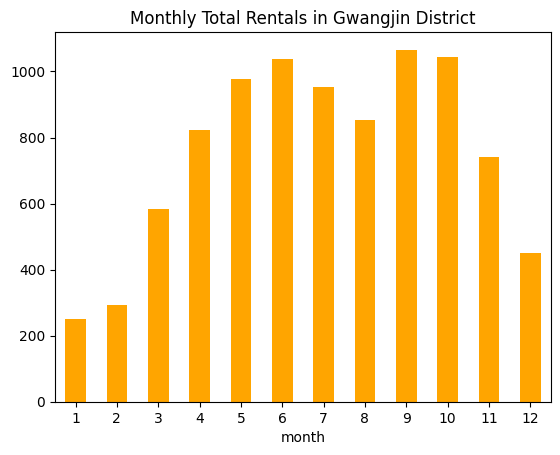

In [ ]:
# 광진구 - 월별 총 대여량

df.groupby('month')['Gwangjin'].sum().plot(kind='bar', title='Monthly Total Rentals in Gwangjin District', color='orange')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 광진구 - 월별-요일별 총 대여량

# Group by month and weekday, then calculate the total rentals
monthly_weekday_total = df.groupby(['month', 'weekday'])['Gwangjin'].sum()

# Pivot for better readability (rows = months, columns = weekdays)
monthly_weekday_table = monthly_weekday_total.unstack()

# Rename weekday columns
monthly_weekday_table.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

print("📊 Monthly and Weekday-wise Total Rentals in Gwangjin District")
print(monthly_weekday_table)

📊 Monthly and Weekday-wise Total Rentals in Gwangjin District
           Mon      Tue      Wed      Thu      Fri      Sat      Sun
month                                                               
1       33.262   32.154   40.902   39.104   40.548   31.914   31.874
2       40.268   36.684   39.588   41.874   42.376   50.110   40.810
3       83.272   91.282   92.132   74.672   87.720   72.534   82.706
4      115.912  118.680  121.636  131.416  115.648  109.112  109.364
5      135.082  126.184  155.100  143.202  140.150  133.752  143.206
6      152.526  148.310  147.714  124.362  147.704  164.368  154.242
7      129.408  148.426  137.720  140.266  153.036  135.692  108.390
8      126.820  113.460  114.178  120.618  134.310  123.002  119.968
9      147.362  139.260  149.078  158.760  151.816  155.336  164.292
10     131.130  155.946  149.620  160.020  151.692  158.466  137.210
11     114.574  108.176  101.596  105.008  118.256  107.620   86.428
12      66.292   71.106   76.390   75.010

📊 Average Rentals by Weekday in Gwangjin District
weekday
Mon    6.104823
Tue    6.170660
Wed    6.342842
Thu    6.288574
Fri    6.448316
Sat    6.218250
Sun    5.889404
Name: Gwangjin, dtype: float64


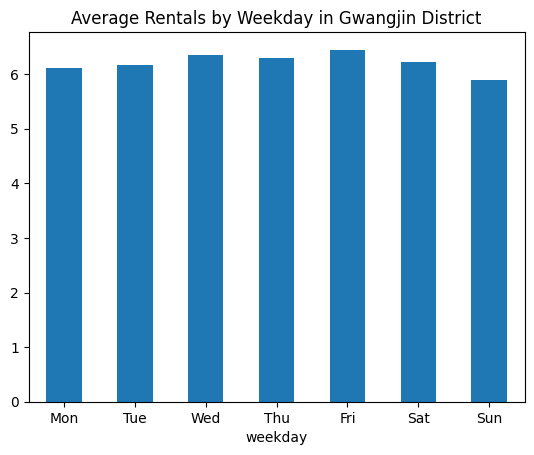

In [ ]:
# 광진구 - 요일별 대여량

# Weekday mapping: numeric to string
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Group by weekday and calculate average
weekday_avg = df.groupby('weekday')['Gwangjin'].mean().rename(index=weekday_map)

# Print values
print("📊 Average Rentals by Weekday in Gwangjin District")
print(weekday_avg)

# Plot
weekday_avg.plot(kind='bar', title='Average Rentals by Weekday in Gwangjin District')
plt.xticks(rotation=0)
plt.show()

# 공휴일 추가

In [ ]:
import pandas as pd
import holidays

# 1. 한국 공휴일 객체 생성
kr_holidays = holidays.KR(years=range(2018, 2023))  # 2018~2022년

# 2. df 복사
df_holiday = df.copy()

# 3. 'date' 컬럼이 datetime 타입인지 확인 및 변환
df_holiday['date'] = pd.to_datetime(df_holiday['date'])

# 4. 공휴일 이름 또는 'not_holiday'로 채운 'holiday' 컬럼 생성
df_holiday['holiday'] = df_holiday['date'].apply(lambda x: kr_holidays.get(x) if x in kr_holidays else 'not_holiday')

# 5. True/False로 표시된 공휴일 여부 컬럼 추가
df_holiday['is_holiday'] = df_holiday['holiday'] != 'not_holiday'

# 확인
df_holiday.head()


,date,Gwangjin,Dongdaemun,Seongdong,Jungnang,year,month,day,weekday,is_weekend,holiday,is_holiday
0,2018-01-01,0.592,0.368,0.580,0.162,2018,1,1,0,False,New Year's Day,True
1,2018-01-02,0.840,0.614,1.034,0.260,2018,1,2,1,False,not_holiday,False
2,2018-01-03,0.828,0.576,0.952,0.288,2018,1,3,2,False,not_holiday,False
3,2018-01-04,0.792,0.542,0.914,0.292,2018,1,4,3,False,not_holiday,False
4,2018-01-05,0.818,0.602,0.994,0.308,2018,1,5,4,False,not_holiday,False


In [ ]:
df_holiday[['date', 'holiday', 'is_holiday']].head(10)

,date,holiday,is_holiday
0,2018-01-01,New Year's Day,True
1,2018-01-02,not_holiday,False
2,2018-01-03,not_holiday,False
3,2018-01-04,not_holiday,False
4,2018-01-05,not_holiday,False
5,2018-01-06,not_holiday,False
6,2018-01-07,not_holiday,False
7,2018-01-08,not_holiday,False
8,2018-01-09,not_holiday,False
9,2018-01-10,not_holiday,False


In [ ]:
df_holiday['holiday'].value_counts()

,count
holiday,
not_holiday,1391
New Year's Day,4
The day preceding Korean New Year,4
Korean New Year,4
The second day of Korean New Year,4
Independence Movement Day,4
Children's Day,4
Buddha's Birthday,4
Memorial Day,4


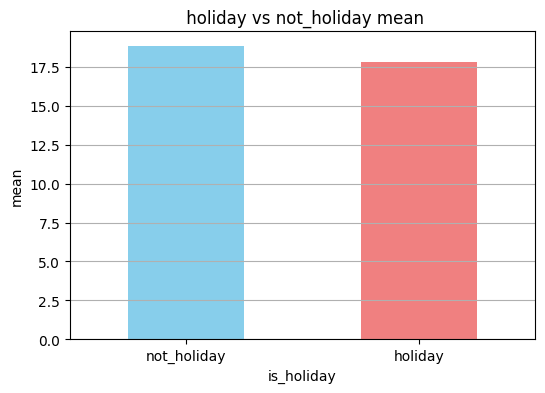

In [ ]:
# 구별 대여량을 합산해서 'total' 컬럼 추가
df_holiday['total'] = df_holiday[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].sum(axis=1)

# is_holiday 기준으로 그룹화 → 평균 total 계산
df_holiday.groupby('is_holiday')['total'].mean().rename({True: 'holiday', False: 'not_holiday'}).plot(
    kind='bar', figsize=(6,4), color=['skyblue', 'lightcoral'])

plt.title(' holiday vs not_holiday mean')
plt.ylabel('mean')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

📈 광진구 잔차가 가장 큰 날 (급증일 후보) 및 공휴일 여부:
           date  Gwangjin  gwangjin_residual         holiday  is_holiday
1329 2021-08-22    11.918           5.234000     not_holiday       False
838  2020-04-18    11.258           5.116000     not_holiday       False
1377 2021-10-09    11.336           4.372667      Hangul Day        True
618  2019-09-11     9.790           4.068000     not_holiday       False
981  2020-09-08     9.450           3.950667     not_holiday       False
1337 2021-08-30    13.242           3.863333     not_holiday       False
1220 2021-05-05    12.446           3.618000  Children's Day        True
867  2020-05-17    10.754           3.494000     not_holiday       False
1248 2021-06-02    11.884           3.274000     not_holiday       False
986  2020-09-13    11.150           3.198000     not_holiday       False


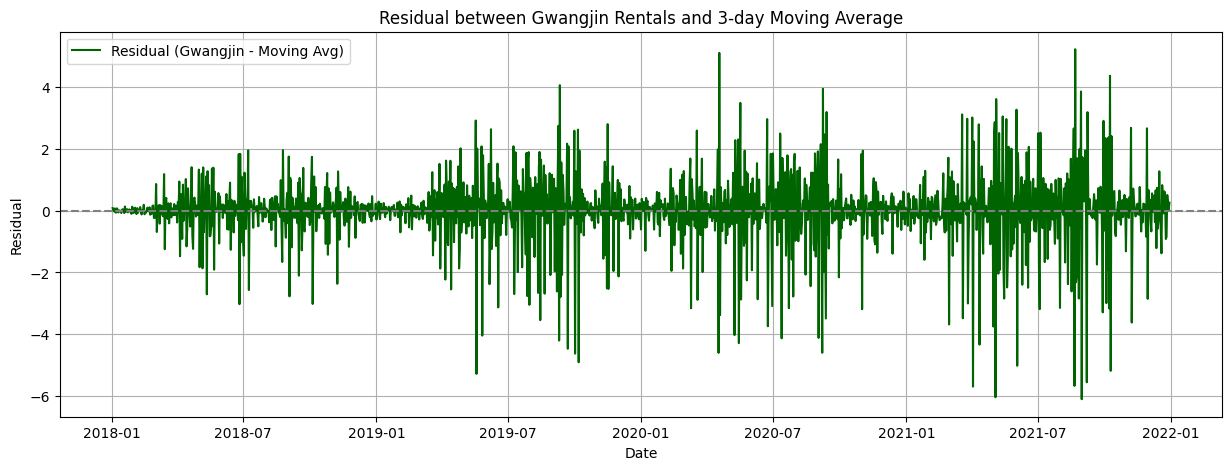

In [ ]:
import matplotlib.pyplot as plt

# 1. df_holiday 복사
df_check = df_holiday.copy()

# 2. 이동 평균 계산 (3일 중심 이동 평균)
df_check['gwangjin_rolling_mean'] = df_check['Gwangjin'].rolling(window=3, center=True).mean()

# 3. 잔차 계산 (실제 - 이동 평균)
df_check['gwangjin_residual'] = df_check['Gwangjin'] - df_check['gwangjin_rolling_mean']

# 4. 잔차가 가장 큰 날 10개 추출
top_gwangjin_spike_days = df_check.sort_values('gwangjin_residual', ascending=False).head(10)

# 5. 결과 출력 (공휴일 정보 포함)
print("📈 광진구 잔차가 가장 큰 날 (급증일 후보) 및 공휴일 여부:")
print(top_gwangjin_spike_days[['date', 'Gwangjin', 'gwangjin_residual', 'holiday', 'is_holiday']])

# 6. 시각화 (잔차 전체 추이)
plt.figure(figsize=(15, 5))
plt.plot(df_check['date'], df_check['gwangjin_residual'], label='Residual (Gwangjin - Moving Avg)', color='darkgreen')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residual between Gwangjin Rentals and 3-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid()
plt.show()


📈 동대문구 잔차가 가장 큰 날 (급증일 후보) 및 공휴일 여부:
           date  Dongdaemun  dongdaemun_residual      holiday  is_holiday
1337 2021-08-30      11.016             3.727333  not_holiday       False
1329 2021-08-22       7.818             2.942000  not_holiday       False
1218 2021-05-03       9.370             2.906667  not_holiday       False
981  2020-09-08       7.024             2.821333  not_holiday       False
1248 2021-06-02      10.086             2.812667  not_holiday       False
1346 2021-09-08      10.618             2.776000  not_holiday       False
838  2020-04-18       6.128             2.544000  not_holiday       False
1377 2021-10-09       7.942             2.540667   Hangul Day        True
1250 2021-06-04       9.880             2.531333  not_holiday       False
1368 2021-09-30      11.298             2.514667  not_holiday       False


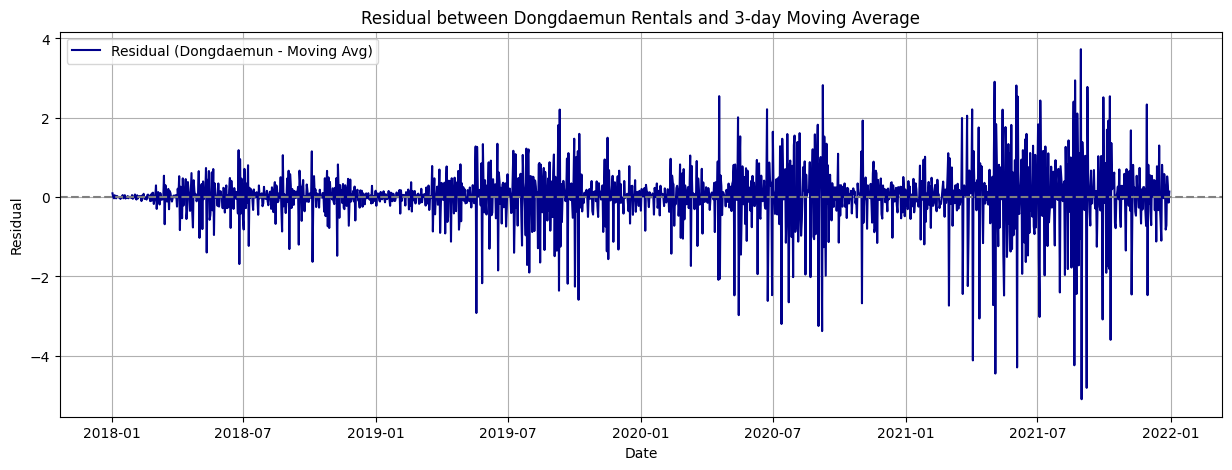

In [ ]:
df_check = df_holiday.copy()

# 이동 평균 (3일 중심)
df_check['dongdaemun_rolling_mean'] = df_check['Dongdaemun'].rolling(window=3, center=True).mean()

# 잔차 계산
df_check['dongdaemun_residual'] = df_check['Dongdaemun'] - df_check['dongdaemun_rolling_mean']

# 잔차 큰 날 10개
top_dongdaemun_spike_days = df_check.sort_values('dongdaemun_residual', ascending=False).head(10)

print("📈 동대문구 잔차가 가장 큰 날 (급증일 후보) 및 공휴일 여부:")
print(top_dongdaemun_spike_days[['date', 'Dongdaemun', 'dongdaemun_residual', 'holiday', 'is_holiday']])

# 시각화
plt.figure(figsize=(15, 5))
plt.plot(df_check['date'], df_check['dongdaemun_residual'], label='Residual (Dongdaemun - Moving Avg)', color='darkblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residual between Dongdaemun Rentals and 3-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid()
plt.show()


📈 중랑구 잔차가 가장 큰 날 (급증일 후보) 및 공휴일 여부:
           date  Jungnang  jungnang_residual      holiday  is_holiday
1329 2021-08-22     6.444           2.750000  not_holiday       False
1377 2021-10-09     6.788           2.603333   Hangul Day        True
838  2020-04-18     5.750           2.537333  not_holiday       False
981  2020-09-08     5.642           2.382000  not_holiday       False
1337 2021-08-30     7.402           2.162000  not_holiday       False
1248 2021-06-02     7.174           2.056000  not_holiday       False
1218 2021-05-03     6.692           1.841333  not_holiday       False
904  2020-06-23     5.958           1.816667  not_holiday       False
1187 2021-04-02     6.408           1.790667  not_holiday       False
864  2020-05-14     5.752           1.735333  not_holiday       False


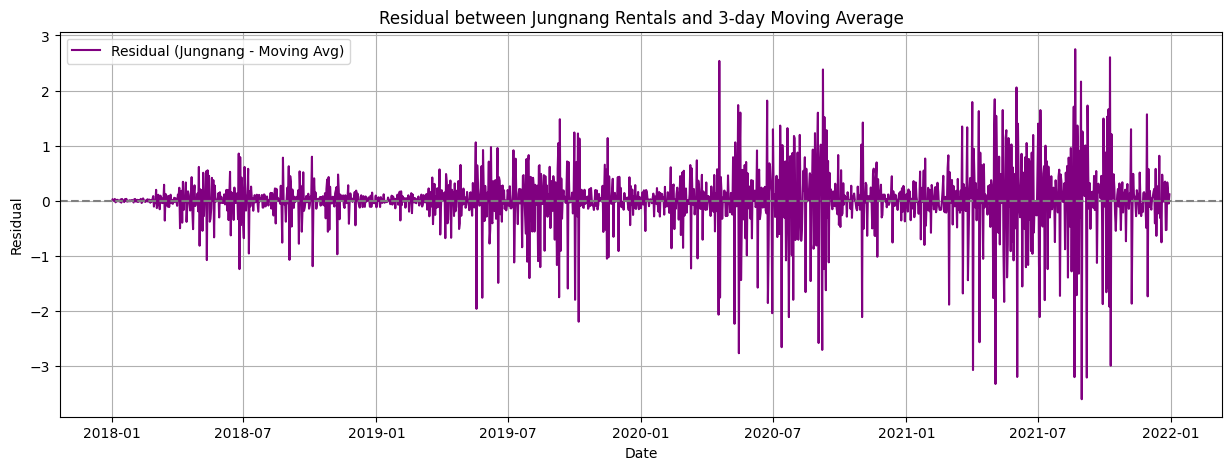

In [ ]:
df_check = df_holiday.copy()

df_check['jungnang_rolling_mean'] = df_check['Jungnang'].rolling(window=3, center=True).mean()
df_check['jungnang_residual'] = df_check['Jungnang'] - df_check['jungnang_rolling_mean']

top_jungnang_spike_days = df_check.sort_values('jungnang_residual', ascending=False).head(10)

print("📈 중랑구 잔차가 가장 큰 날 (급증일 후보) 및 공휴일 여부:")
print(top_jungnang_spike_days[['date', 'Jungnang', 'jungnang_residual', 'holiday', 'is_holiday']])

plt.figure(figsize=(15, 5))
plt.plot(df_check['date'], df_check['jungnang_residual'], label='Residual (Jungnang - Moving Avg)', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residual between Jungnang Rentals and 3-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid()
plt.show()


📈 성동구 잔차가 가장 큰 날 (급증일 후보) 및 공휴일 여부:
           date  Seongdong  seongdong_residual         holiday  is_holiday
1329 2021-08-22     10.098            4.598000     not_holiday       False
981  2020-09-08      9.858            4.246667     not_holiday       False
838  2020-04-18      9.296            4.246000     not_holiday       False
1220 2021-05-05     12.348            4.112000  Children's Day        True
1377 2021-10-09     10.142            4.098000      Hangul Day        True
986  2020-09-13     12.500            3.978000     not_holiday       False
1196 2021-04-11     11.572            3.548000     not_holiday       False
618  2019-09-11      7.222            3.158667     not_holiday       False
867  2020-05-17      9.568            3.156667     not_holiday       False
1337 2021-08-30     10.778            3.094000     not_holiday       False


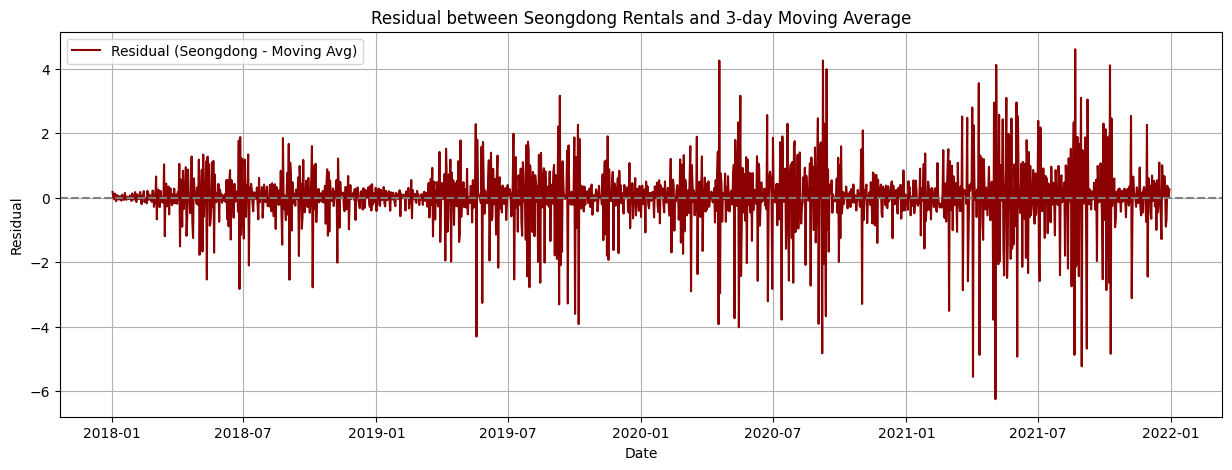

In [ ]:
df_check = df_holiday.copy()

df_check['seongdong_rolling_mean'] = df_check['Seongdong'].rolling(window=3, center=True).mean()
df_check['seongdong_residual'] = df_check['Seongdong'] - df_check['seongdong_rolling_mean']

top_seongdong_spike_days = df_check.sort_values('seongdong_residual', ascending=False).head(10)

print("📈 성동구 잔차가 가장 큰 날 (급증일 후보) 및 공휴일 여부:")
print(top_seongdong_spike_days[['date', 'Seongdong', 'seongdong_residual', 'holiday', 'is_holiday']])

plt.figure(figsize=(15, 5))
plt.plot(df_check['date'], df_check['seongdong_residual'], label='Residual (Seongdong - Moving Avg)', color='darkred')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residual between Seongdong Rentals and 3-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid()
plt.show()


📊 Gwangjin 지역 상관관계 Heatmap


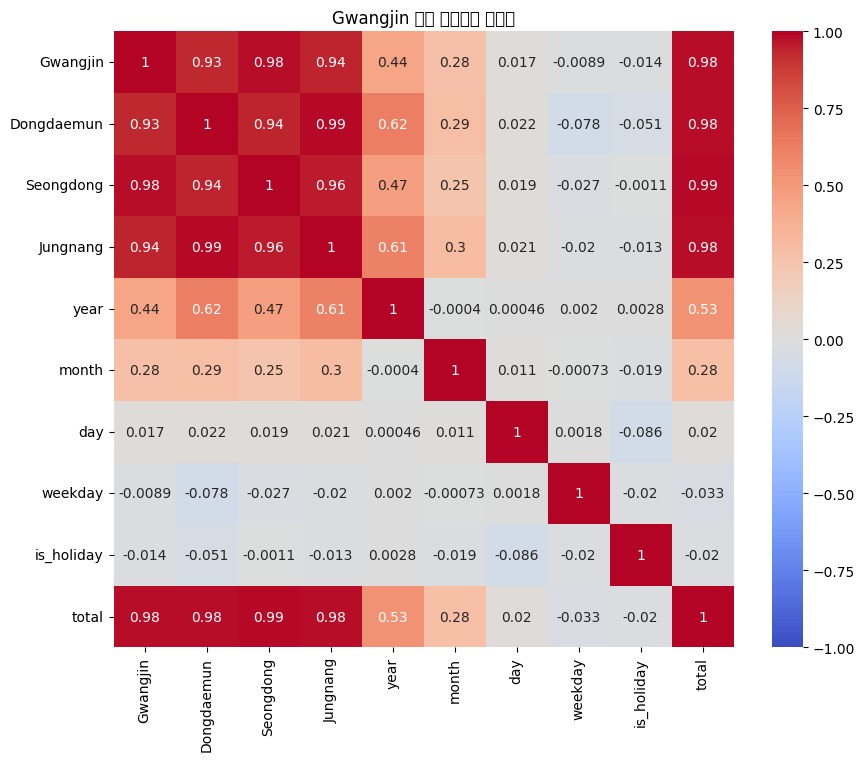

📊 Dongdaemun 지역 상관관계 Heatmap


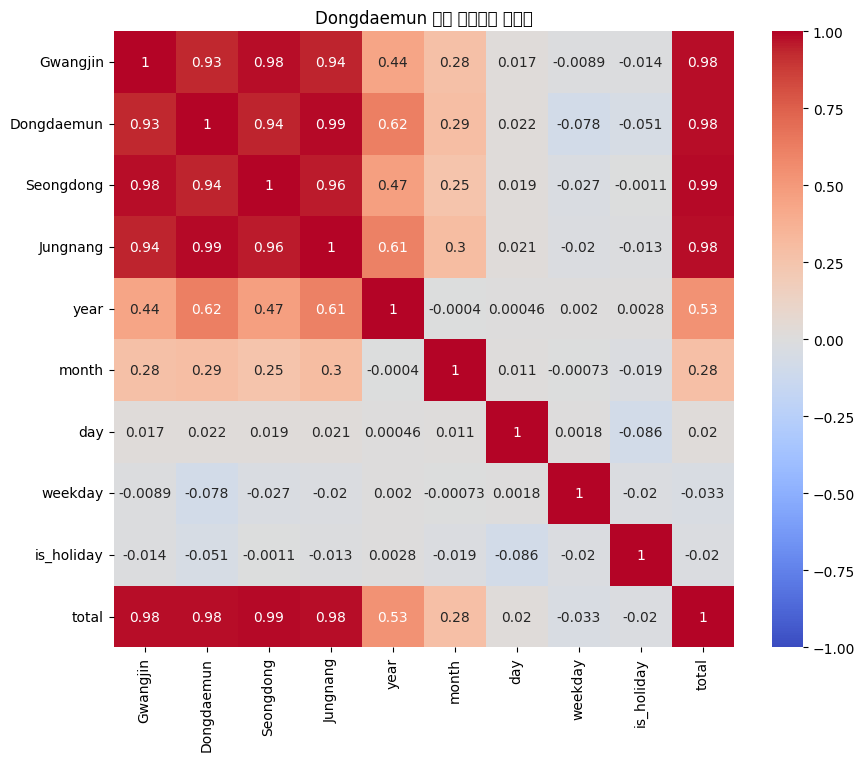

📊 Jungnang 지역 상관관계 Heatmap


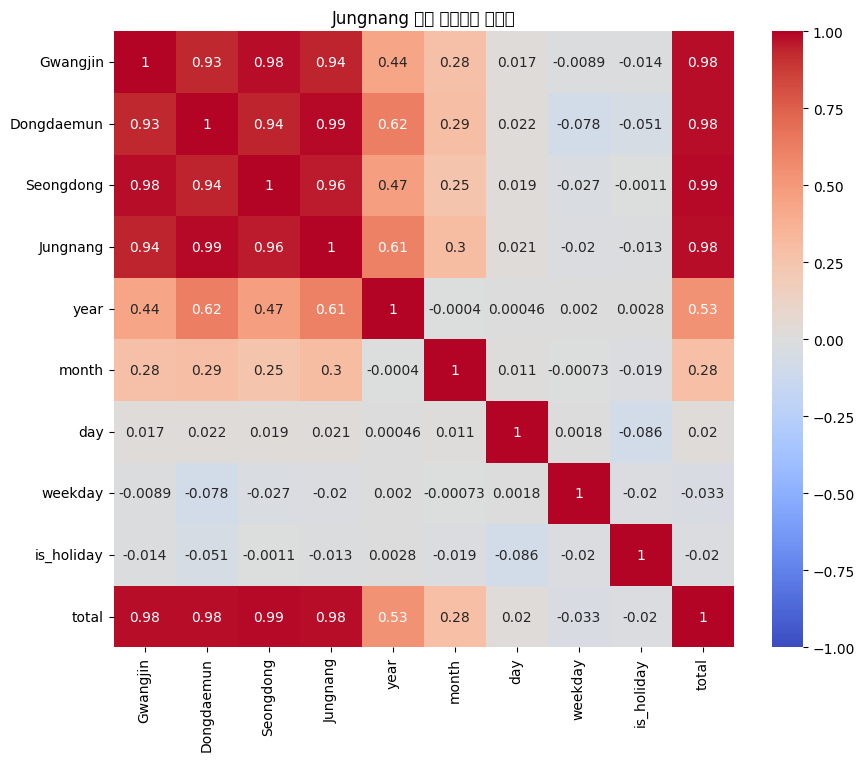

📊 Seongdong 지역 상관관계 Heatmap


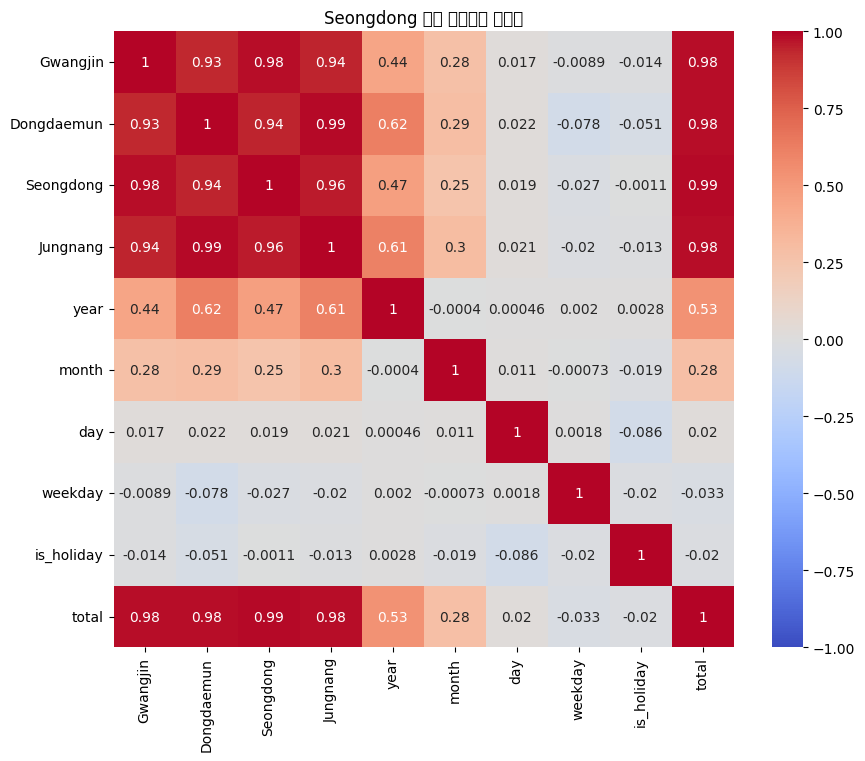

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 전처리: 공백 제거 (안 되어 있다면)
df_holiday.columns = df_holiday.columns.str.strip()

# 2. 분석할 지역 컬럼 리스트
region_list = ['Gwangjin', 'Dongdaemun', 'Jungnang', 'Seongdong']

# 3. 반복 수행
for region in region_list:
    print(f"📊 {region} 지역 상관관계 Heatmap")

    # 지역별로 df 복사 + 필요한 컬럼만
    df_region = df_holiday.copy()

    # is_holiday: bool → int
    if df_region['is_holiday'].dtype == 'bool':
        df_region['is_holiday'] = df_region['is_holiday'].astype(int)

    # date, holiday 등 비수치형 컬럼 제외
    cols_to_use = df_region.select_dtypes(include=['number']).columns

    # 상관계수 계산
    corr = df_region[[*cols_to_use]].corr()

    # 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{region} 지역 상관관계 히트맵')
    plt.show()


In [ ]:
import pandas as pd

# 1. 지역 리스트
regions = ['Gwangjin', 'Seongdong', 'Dongdaemun', 'Jungnang']

# 2. 복사본 생성
df_check = df_holiday.copy()
df_check.columns = df_check.columns.str.strip()  # 혹시 모를 공백 제거

# 3. 결과 저장용 리스트
top_residuals_all = []

# 4. 지역별로 잔차 계산 + 상위 10개 추출
for region in regions:
    # 이동 평균
    rolling_col = f'{region}_rolling_mean'
    residual_col = f'{region}_residual'
    df_check[rolling_col] = df_check[region].rolling(window=3, center=True).mean()
    df_check[residual_col] = df_check[region] - df_check[rolling_col]

    # 상위 10개 잔차 큰 날 추출
    top_residuals = df_check.sort_values(residual_col, ascending=False).head(10)

    # 필요한 열 + 지역 정보 추가
    top_residuals = top_residuals[['date', region, residual_col, 'holiday', 'is_holiday']].copy()
    top_residuals['region'] = region  # 지역명 컬럼 추가

    # 컬럼명 통일
    top_residuals.rename(columns={
        region: 'rental_count',
        residual_col: 'residual'
    }, inplace=True)

    # 리스트에 추가
    top_residuals_all.append(top_residuals)

# 5. 모든 지역 결과 합치기
df_top_spikes = pd.concat(top_residuals_all, ignore_index=True)

# 6. 잔차 기준 전체 정렬 (선택)
df_top_spikes = df_top_spikes.sort_values('residual', ascending=False)

# 7. 출력
print("📊 지역별 대여량 급증일 및 공휴일 여부")
print(df_top_spikes[['region', 'date', 'rental_count', 'residual', 'holiday', 'is_holiday']])


📊 지역별 대여량 급증일 및 공휴일 여부
        region       date  rental_count  residual         holiday  is_holiday
0     Gwangjin 2021-08-22        11.918  5.234000     not_holiday       False
1     Gwangjin 2020-04-18        11.258  5.116000     not_holiday       False
10   Seongdong 2021-08-22        10.098  4.598000     not_holiday       False
2     Gwangjin 2021-10-09        11.336  4.372667      Hangul Day        True
11   Seongdong 2020-09-08         9.858  4.246667     not_holiday       False
12   Seongdong 2020-04-18         9.296  4.246000     not_holiday       False
13   Seongdong 2021-05-05        12.348  4.112000  Children's Day        True
14   Seongdong 2021-10-09        10.142  4.098000      Hangul Day        True
3     Gwangjin 2019-09-11         9.790  4.068000     not_holiday       False
15   Seongdong 2020-09-13        12.500  3.978000     not_holiday       False
4     Gwangjin 2020-09-08         9.450  3.950667     not_holiday       False
5     Gwangjin 2021-08-30        13.242  

In [ ]:
import pandas as pd

# 지역 리스트
areas = ['Gwangjin', 'Seongdong', 'Dongdaemun', 'Jungnang']

# 결과 저장용 딕셔너리
spike_dates = {}

# 각 지역별 급증일(top 10) 구하기
for area in areas:
    # rolling 평균과 잔차 계산
    df_copy[f'{area}_rolling_mean'] = df_copy[area].rolling(window=3, center=True).mean()
    df_copy[f'{area}_residual'] = df_copy[area] - df_copy[f'{area}_rolling_mean']

    # 잔차가 큰 상위 10개 날짜 추출
    top_dates = df_copy.nlargest(10, f'{area}_residual')['date']

    # 결과 저장
    spike_dates[area] = set(top_dates)

# 공통 급증일 찾기 (모든 지역에서 겹치는 날짜)
common_spike_dates = set.intersection(*spike_dates.values())

# 결과 출력
print("여러 구에서 동시에 급증한 날짜:")
for date in sorted(common_spike_dates):
    print(date.strftime('%Y-%m-%d'))


여러 구에서 동시에 급증한 날짜:
2020-04-18
2020-09-08
2021-08-22
2021-08-30
2021-10-09
